# ATMS 305
## Homework 10: Linear regression
---
### Problem 1

Perform a linear regression between hourly temperature `(DryBulbCelsius)` and dewpoint `(DewPointCelsius)` at Chicago for the month of August 2015.  Ignore missing data.

(a) Make a 2-D PDF of the data, with ranges of 10 to 38 C for `DryBulbCelsius` and 6 to 24 C for `DewPointCelsius`, with bins every 1 degree C.

Populating the interactive namespace from numpy and matplotlib


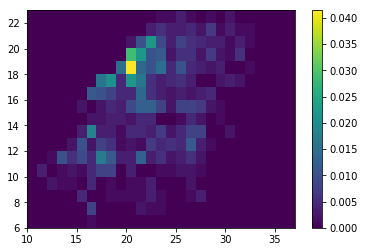

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%pylab inline
dbulb = arange(10,38,1)
dew = arange(6,24,1)
data = pd.read_csv('chicago_hourly_aug_2015.csv', header = 6)
data['DryBulbCelsius']

hist_2d_data=plt.hist2d(data['DryBulbCelsius'],data['DewPointCelsius'], bins= [dbulb,dew], normed = True)
plt.colorbar()

(a) Make a scatter plot of the data, and the linear regression fit.  Include a legend.

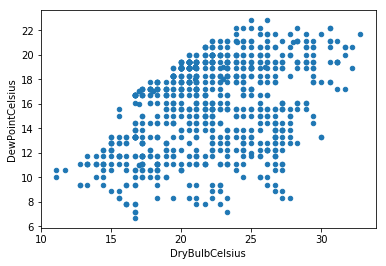

In [2]:
data.plot(kind="scatter", x = 'DryBulbCelsius', y = 'DewPointCelsius')

(b) What are the fit coefficients (intercept and slope)?

In [3]:
lm = smf.ols(formula="DryBulbCelsius ~ DewPointCelsius", data=data).fit()
lm.params

Intercept          14.640334
DewPointCelsius     0.455232
dtype: float64

(c) What is the 95% confidence interval of the fit?

In [4]:
lm.conf_int(0.05)

,0,1
Intercept,13.515496,15.765171
DewPointCelsius,0.386031,0.524433


(d) Can we reject the null hypothesis that there is no relation between temperature and dewpoint (YES/NO)?  At what confidence level?

(e) What is the value of $R^2$ for this fit?

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DryBulbCelsius   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     166.7
Date:                Mon, 18 Dec 2017   Prob (F-statistic):           5.21e-35
Time:                        02:07:01   Log-Likelihood:                -2377.6
No. Observations:                 869   AIC:                             4759.
Df Residuals:                     867   BIC:                             4769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          14.6403      0.573     25.546      0.000        13.515    15.765
DewPointCelsius     0.4552      0.035     12.912      0.000         0.386     0.524
==============================================================================
Omnibus:                       66.890   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.445
Skew:                           0.473   Prob(JB):                     3.02e-11
Kurtosis:                       2.335   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) Using your model, predict what the most likely dewpoint would be if the temperature was 40 C.

In [12]:
lm.params

14.640334 + 40*(0.455232)

32.849614

(g) What would the range of predictions at 40C be using the 95% confidence interval calculated in part (c)?